In [1]:
# main libraries
import pandas as pd
import numpy as np
import time
# visual libraries
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')
# sklearn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
pip install pandas


SyntaxError: invalid syntax (<ipython-input-3-a6eb55a2cf5c>, line 1)

In [7]:
# Read the data in the CSV file using pandas
df=pd.read_csv("/home/charvijain16/Desktop/PrivacyPreservingSensitiveData/Preprocessing/clinical_data.csv",encoding='ISO-8859-3')
pd.options.display.max_columns = None
dataframe = df
df.head()
#df.dtypes.value_counts()
# pandas drop columns using list of column names
# newdf=dataframe.drop(['doppeltnom','Geschlecht','Bluthochdruck', 'Diabetesmellitus','Blutverdünner','Nikotin','Begleitrisiken','Trägergefäss','SABAnsForm','KalkThrombus','cerebraleAnomalien','Therapie','backtonormallife','Wiedereinstrom','WiedereinstromNeu','GrössenzunahmenachIntervention','Zweiteingriffe','Komplikationen','Ruptur','Grössenzunahmewährend', 'KalkThrCodiert','andereZweiteingriffe'], axis=1)
# newdf=newdf.drop([newdf.index[224]]) 


,patientId,InzSAb,doppelt,doppeltnom,Geschlecht,GeschlechtNum,Alter,AlterGebärf,Altersklassen,Behandlungsbeginn,BMI,BMIKlassen,Bluthochdruck,artHyperCodiert,Diabetesmellitus,DiabMellCodiert,Blutverdünner,BlutverdünnerCodiert,Nikotin,NikotinCodiert,Begleitrisiken,PHASES,AnzahlAns,Trägergefäss,TrägZusCodiert,TrägSeitCodiert,SABAnsLänge,SABAnsBreite,LängeGruppiert,LängePhases,SABAnsForm,FormCodiert,KalkThrombus,KalkThrCodiert,cerebraleAnomalien,cerebrAnoCodiert,Therapie,VglOffenInterv,TherCodiert,Zustand30Tage,Zustand1Jahr,backtonormallife,btnlCodiert,GOSlängstmöglich,Wiedereinstrom,WiedereinstCodiert,WiedereinstromNeu,GrössenzunahmenachIntervention,GrössnachInterCodiert,ZeitzumReEinstrom,ZeitinIntervallen,Zweiteingriffe,ZweiteingriffeAne,andereZweiteingriffe,Komplikationen,ZweiteingrCodiert,Ruptur,RuptCodiert,KomplCodiert,filter_$,Grössenzunahmewährend,GrössWährCodiert
0,1,1,1,d,w,2.0,62.0,2.0,13.0,2015-10-15,34.0,4.0,ja,2.0,nein,1.0,nachher,3.0,ff,NaN,NaN,6.0,2.0,A.comm.ant,2.0,3.0,3.0,2.0,2.0,1.0,blister,4.0,NaN,NaN,"infundibulär, Erwei",3.0,konservativ,1.0,1.0,NaN,NaN,NaN,NaN,NaN,konservativ,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,keine,NaN,keine Ruptur,1.0,1.0,0.0,nein,1.0
1,2,1,1,d,w,2.0,30.0,1.0,7.0,2010-07-03,26.0,3.0,nein,1.0,nein,1.0,nachher,3.0,ff,NaN,NaN,5.0,2.0,A.comm.post. rechts,5.0,9.0,2.0,2.0,2.0,1.0,blister,4.0,NaN,NaN,keine,1.0,Stent+Coil,3.0,5.0,NaN,NaN,yes,2.0,5.0,kein Einstrom,2.0,NaN,nein,1.0,NaN,NaN,keine Zweiteingriffe,NaN,NaN,keine,1.0,keine Ruptur,1.0,1.0,0.0,ja,2.0
2,3,1,1,d,w,2.0,46.0,2.0,10.0,2012-03-02,26.0,3.0,ja,2.0,ja,2.0,keine,1.0,ja,2.0,NaN,6.0,4.0,A.comm.post. links,5.0,8.0,5.0,2.0,2.0,1.0,irregulär,3.0,NaN,NaN,fetale Posterior rec,7.0,Clip,2.0,2.0,NaN,NaN,yes,2.0,5.0,kein Einstrom,2.0,NaN,nein,1.0,NaN,NaN,Wundrevision,NaN,NaN,NaN,5.0,keine Ruptur,1.0,NaN,0.0,nein,1.0
3,4,1,1,d,w,2.0,45.0,1.0,10.0,2014-01-29,21.0,2.0,ja,2.0,nein,1.0,keine,1.0,ff,NaN,NaN,6.0,3.0,A.comm.ant,2.0,3.0,5.0,3.0,2.0,1.0,irregulär,3.0,NaN,NaN,keine,1.0,Coil,3.0,4.0,NaN,NaN,yes,2.0,4.0,kein Einstrom,2.0,NaN,nein,1.0,NaN,NaN,keine Zweiteingriffe,NaN,NaN,keine,1.0,keine Ruptur,1.0,1.0,0.0,nein,1.0
4,5,1,1,d,w,2.0,59.0,2.0,12.0,2013-12-01,NaN,NaN,ja,2.0,nein,1.0,vorher,2.0,ff,NaN,NaN,2.0,3.0,A.carotis int.links,9.0,15.0,4.0,3.0,2.0,1.0,irregulär,3.0,NaN,NaN,weitere,8.0,Stent+Coil,3.0,5.0,NaN,NaN,yes,2.0,5.0,kein Einstrom,2.0,NaN,nein,1.0,NaN,NaN,andere,NaN,NaN,NaN,6.0,keine Ruptur,1.0,NaN,0.0,nein,1.0


In [4]:
newdf['Behandlungsbeginn'] = pd.to_datetime(newdf['Behandlungsbeginn'],format='%Y.%m.%d')
newdf['YearsfromBeginning'] = newdf['Behandlungsbeginn'].apply(lambda x : (pd.datetime.now().year - x.year  - ((pd.datetime.now().month, pd.datetime.now().day) < (x.month, x.day))))
newdf=newdf.drop(['Behandlungsbeginn'], axis=1)

NameError: name 'newdf' is not defined

In [104]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(newdf.head(450))
    #display(newdf.isnull().sum())
    #print("---------------------------")
    #display(newdf.dtypes)


,patientId,InzSAb,doppelt,GeschlechtNum,Alter,AlterGebärf,Altersklassen,BMI,BMIKlassen,artHyperCodiert,DiabMellCodiert,BlutverdünnerCodiert,NikotinCodiert,PHASES,AnzahlAns,TrägZusCodiert,TrägSeitCodiert,SABAnsLänge,SABAnsBreite,LängeGruppiert,LängePhases,FormCodiert,cerebrAnoCodiert,VglOffenInterv,TherCodiert,Zustand30Tage,Zustand1Jahr,btnlCodiert,GOSlängstmöglich,WiedereinstCodiert,GrössnachInterCodiert,ZeitzumReEinstrom,ZeitinIntervallen,ZweiteingriffeAne,ZweiteingrCodiert,RuptCodiert,KomplCodiert,filter_$,GrössWährCodiert,YearsfromBeginning
0,1,1,1,2.0,62.0,2.0,13.0,34.0,4.0,2.0,1.0,3.0,NaN,6.0,2.0,2.0,3.0,3.00000,2.000000,1.0,1.0,4.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,1.0,5.0
1,2,1,1,2.0,30.0,1.0,7.0,26.0,3.0,1.0,1.0,3.0,NaN,5.0,2.0,5.0,9.0,2.00000,2.000000,1.0,1.0,4.0,1.0,3.0,5.0,NaN,NaN,2.0,5.0,2.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,0.0,2.0,10.0
2,3,1,1,2.0,46.0,2.0,10.0,26.0,3.0,2.0,2.0,1.0,2.0,6.0,4.0,5.0,8.0,5.00000,2.000000,1.0,1.0,3.0,7.0,2.0,2.0,NaN,NaN,2.0,5.0,2.0,1.0,NaN,NaN,NaN,5.0,1.0,NaN,0.0,1.0,8.0
3,4,1,1,2.0,45.0,1.0,10.0,21.0,2.0,2.0,1.0,1.0,NaN,6.0,3.0,2.0,3.0,5.00000,3.000000,1.0,1.0,3.0,1.0,3.0,4.0,NaN,NaN,2.0,4.0,2.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,0.0,1.0,6.0
4,5,1,1,2.0,59.0,2.0,12.0,25.0,3.0,2.0,1.0,2.0,NaN,2.0,3.0,9.0,15.0,4.00000,3.000000,1.0,1.0,3.0,8.0,3.0,5.0,NaN,NaN,2.0,5.0,2.0,1.0,NaN,NaN,NaN,6.0,1.0,NaN,0.0,1.0,7.0
5,6,1,1,1.0,63.0,2.0,13.0,25.0,3.0,2.0,1.0,1.0,2.0,5.0,2.0,5.0,8.0,6.00000,3.000000,1.0,1.0,3.0,7.0,3.0,4.0,NaN,NaN,2.0,5.0,3.0,1.0,0.0,1.0,NaN,1.0,2.0,1.0,0.0,1.0,5.0
6,7,1,1,1.0,33.0,1.0,7.0,29.0,3.0,1.0,1.0,1.0,2.0,3.0,2.0,4.0,6.0,5.00000,4.000000,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0,5.0,2.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,0.0,1.0,9.0
7,8,1,1,1.0,47.0,2.0,10.0,46.0,6.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,6.0,2.00000,2.000000,1.0,1.0,4.0,7.0,2.0,3.0,NaN,NaN,2.0,5.0,3.0,1.0,0.0,1.0,NaN,5.0,1.0,4.0,0.0,1.0,8.0
8,9,1,1,2.0,56.0,2.0,12.0,22.3,2.0,2.0,1.0,3.0,1.0,2.0,2.0,9.0,15.0,4.00000,4.000000,1.0,1.0,2.0,1.0,3.0,6.0,NaN,NaN,2.0,5.0,NaN,3.0,NaN,NaN,NaN,1.0,1.0,3.0,0.0,1.0,3.0
9,10,1,1,2.0,56.0,2.0,12.0,25.0,3.0,2.0,1.0,1.0,1.0,4.0,4.0,4.0,7.0,3.00000,2.000000,1.0,1.0,1.0,8.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,1.0,3.0


In [99]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(newdf.isnull().sum())
    print("---------------------------")
    display(newdf.dtypes)

patientId                  0
InzSAb                     0
doppelt                    0
GeschlechtNum              0
Alter                      0
AlterGebärf                0
Altersklassen              0
BMI                        0
BMIKlassen                 0
artHyperCodiert           33
DiabMellCodiert           50
BlutverdünnerCodiert      26
NikotinCodiert           264
PHASES                     0
AnzahlAns                  0
TrägZusCodiert             0
TrägSeitCodiert            0
SABAnsLänge                0
SABAnsBreite               0
LängeGruppiert             0
LängePhases                0
FormCodiert               25
cerebrAnoCodiert          15
VglOffenInterv             0
TherCodiert                0
Zustand30Tage            233
Zustand1Jahr             281
btnlCodiert               91
GOSlängstmöglich          76
WiedereinstCodiert        59
GrössnachInterCodiert    223
ZeitzumReEinstrom        292
ZeitinIntervallen        292
ZweiteingriffeAne        251
ZweiteingrCodi

---------------------------


patientId                  int64
InzSAb                     int64
doppelt                    int64
GeschlechtNum            float64
Alter                    float64
AlterGebärf              float64
Altersklassen            float64
BMI                      float64
BMIKlassen               float64
artHyperCodiert          float64
DiabMellCodiert          float64
BlutverdünnerCodiert     float64
NikotinCodiert           float64
PHASES                   float64
AnzahlAns                float64
TrägZusCodiert           float64
TrägSeitCodiert          float64
SABAnsLänge              float64
SABAnsBreite             float64
LängeGruppiert           float64
LängePhases              float64
FormCodiert              float64
cerebrAnoCodiert         float64
VglOffenInterv           float64
TherCodiert              float64
Zustand30Tage            float64
Zustand1Jahr             float64
btnlCodiert              float64
GOSlängstmöglich         float64
WiedereinstCodiert       float64
GrössnachI

In [55]:
newdf['Alter'].median()
newdf.Alter[274]=54
newdf.AlterGebärf[274]=2
newdf.Altersklassen[274]=11

/home/charvi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/charvi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/charvi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [63]:
newdf['BMI'].median()
newdf['BMI'].fillna((newdf['BMI'].median()), inplace=True)
newdf['BMIKlassen'] = newdf['BMIKlassen'].fillna(3)
#newdf.Alter[274]=54
#newdf.AlterGebärf[274]=2
#newdf.Altersklassen[274]=11

In [86]:
#newdf['PHASES'].mode()
#newdf['SABAnsLänge'].fillna((newdf['SABAnsLänge'].mean()), inplace=True)
#newdf['SABAnsBreite'].fillna((newdf['SABAnsBreite'].mean()), inplace=True)
#newdf['LängePhases'] = newdf['LängePhases'].fillna(1)
#newdf['LängeGruppiert'] = newdf['LängePhases'].fillna(3)
newdf['PHASES'] = newdf['PHASES'].fillna(5)
#newdf['LängeGruppiert'].median()
#newdf['LängePhases'].median()
             

In [89]:
newdf['TrägSeitCodiert'] = newdf['TrägSeitCodiert'].fillna(13)

In [92]:
newdf['filter_$'] = newdf['filter_$'].fillna(0)

In [93]:
newdf['YearsfromBeginning'].fillna((newdf['YearsfromBeginning'].median()), inplace=True)


In [97]:
#newdf.TherCodiert[304]=4
newdf['TherCodiert'] = newdf['TherCodiert'].fillna(2)

In [100]:
# Number of unique classes in each object column
newdf.select_dtypes('object').apply(pd.Series.nunique, axis = 0)
# Number of unique classes in each object column
newdf.select_dtypes('float64').apply(pd.Series.nunique, axis = 0)

GeschlechtNum             2
Alter                    64
AlterGebärf               2
Altersklassen            16
BMI                      76
BMIKlassen                6
artHyperCodiert           2
DiabMellCodiert           2
BlutverdünnerCodiert      3
NikotinCodiert            3
PHASES                   15
AnzahlAns                 4
TrägZusCodiert           10
TrägSeitCodiert          18
SABAnsLänge              55
SABAnsBreite             44
LängeGruppiert            4
LängePhases               4
FormCodiert               4
cerebrAnoCodiert          9
VglOffenInterv            3
TherCodiert               6
Zustand30Tage             5
Zustand1Jahr              5
btnlCodiert               2
GOSlängstmöglich          5
WiedereinstCodiert        4
GrössnachInterCodiert     3
ZeitzumReEinstrom        26
ZeitinIntervallen         5
ZweiteingriffeAne         9
ZweiteingrCodiert         6
RuptCodiert               4
KomplCodiert              4
filter_$                  2
GrössWährCodiert    

In [101]:
newdf.shape

(447, 40)

In [102]:
# get the number of missing data points per column
missing_values_count = newdf.isnull().sum()

# how many total missing values do we have?
total_cells = np.product(newdf.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

17.880313199105146

,patientId,InzSAb,doppelt,GeschlechtNum,Alter,AlterGebärf,Altersklassen,BMI,BMIKlassen,artHyperCodiert,DiabMellCodiert,BlutverdünnerCodiert,NikotinCodiert,PHASES,AnzahlAns,TrägZusCodiert,TrägSeitCodiert,SABAnsLänge,SABAnsBreite,LängeGruppiert,LängePhases,FormCodiert,cerebrAnoCodiert,VglOffenInterv,TherCodiert,Zustand30Tage,Zustand1Jahr,btnlCodiert,GOSlängstmöglich,WiedereinstCodiert,GrössnachInterCodiert,ZeitzumReEinstrom,ZeitinIntervallen,ZweiteingriffeAne,ZweiteingrCodiert,RuptCodiert,KomplCodiert,filter_$,GrössWährCodiert,YearsfromBeginning
count,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,414.000000,397.000000,421.000000,183.000000,437.000000,447.000000,447.000000,446.000000,437.000000,432.000000,437.000000,437.000000,422.000000,432.000000,447.000000,441.000000,214.000000,166.000000,356.000000,371.000000,388.000000,224.000000,155.000000,155.000000,196.000000,146.000000,249.000000,182.000000,437.000000,225.000000,437.000000
mean,224.498881,1.496644,2.328859,1.709172,54.064877,1.731544,11.409396,25.770694,2.847875,1.763285,1.133501,1.824228,1.830601,5.469108,1.422819,4.991051,8.340807,6.738330,5.045532,2.755149,1.610984,2.317536,3.057870,2.427293,3.310658,3.303738,4.024096,1.713483,4.212938,2.404639,1.325893,7.754839,2.045161,3.989796,1.547945,1.277108,1.313187,0.011442,1.328889,7.270023
std,129.615781,0.500549,0.667399,0.454653,13.387726,0.443653,2.679469,4.186083,0.780444,0.425580,0.340545,0.860499,0.501364,2.940867,0.788208,2.848949,5.111388,4.642904,3.911735,0.946748,0.829318,0.956848,2.619556,0.774288,1.494262,1.295092,1.330080,0.452770,1.292575,1.013439,0.572970,16.798014,1.213249,3.075111,1.308235,0.740204,0.776550,0.106474,0.680278,3.723265
min,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,14.100000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000
25%,112.500000,1.000000,2.000000,1.000000,45.000000,1.000000,10.000000,24.000000,2.000000,2.000000,1.000000,1.000000,2.000000,4.000000,1.000000,2.000000,3.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,4.000000,1.000000,4.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
50%,224.000000,1.000000,2.000000,2.000000,54.000000,2.000000,11.000000,25.000000,3.000000,2.000000,1.000000,2.000000,2.000000,5.000000,1.000000,4.000000,7.000000,6.000000,4.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,4.000000,5.000000,2.000000,5.000000,2.000000,1.000000,4.000000,2.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,6.000000
75%,336.500000,2.000000,3.000000,2.000000,63.000000,2.000000,13.000000,27.000000,3.000000,2.000000,1.000000,3.000000,2.000000,7.000000,2.000000,8.000000,13.000000,8.000000,6.000000,3.000000,2.000000,3.000000,5.000000,3.000000,4.000000,4.000000,5.000000,2.000000,5.000000,3.000000,2.000000,7.000000,3.000000,8.000000,1.000000,1.000000,1.000000,0.000000,1.000000,9.000000
max,448.000000,2.000000,3.000000,2.000000,86.000000,2.000000,18.000000,52.000000,6.000000,2.000000,2.000000,3.000000,3.000000,16.000000,4.000000,10.000000,18.000000,40.000000,37.000000,6.000000,4.000000,4.000000,9.000000,3.000000,6.000000,5.000000,5.000000,2.000000,5.000000,4.000000,3.000000,156.000000,5.000000,9.000000,6.000000,4.000000,4.000000,1.000000,3.000000,24.000000


In [73]:
#To predict a categorical variable, a classification machine learning algorithm is required such as Logistic Regression, SVM, Naive Bayes, etc.
#To predict a continuous variable, a regression machine learning algorithm is required such as Linear Regression, SVR, etc

In [28]:
# Find correlations with the target and sort
correlations = newdf.corr()['InzSAb'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(40))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 btnlCodiert             -0.414703
GOSlängstmöglich        -0.406065
TrägSeitCodiert         -0.288374
TrägZusCodiert          -0.281462
Alter                   -0.201441
Altersklassen           -0.198633
AnzahlAns               -0.152678
AlterGebärf             -0.147013
BMI                     -0.133268
BMIKlassen              -0.130454
SABAnsBreite            -0.119488
GeschlechtNum           -0.112674
filter_$                -0.104429
DiabMellCodiert         -0.073586
artHyperCodiert         -0.072998
Begindate               -0.066953
ZeitzumReEinstrom       -0.058020
LängePhases             -0.052668
SABAnsLänge             -0.049242
ZeitinIntervallen       -0.031978
LängeGruppiert          -0.024652
BlutverdünnerCodiert    -0.000118
NikotinCodiert           0.070830
PHASES                   0.077232
FormCodiert              0.083866
cerebrAnoCodiert         0.155878
TherCodiert              0.160763
GrössnachInterCodiert    0.284211
VglOffenInterv     

In [25]:
all_features = newdf[[
                       
'InzSAb',                   
'doppelt',                    
'GeschlechtNum'  ,         
'Alter' ,          
'AlterGebärf'      ,    
'Altersklassen'    ,        
'BMI'   ,       
'BMIKlassen'   ,       
'artHyperCodiert'   ,     
'DiabMellCodiert'   ,     
'BlutverdünnerCodiert',    
'NikotinCodiert'        ,  
'PHASES'                 ,  
'AnzahlAns'               ,
'TrägZusCodiert'          ,
'TrägSeitCodiert'          ,
'SABAnsLänge'              ,
'SABAnsBreite'            ,
'LängeGruppiert'          ,
'LängePhases'           ,
'FormCodiert'         ,
'cerebrAnoCodiert'        ,
'VglOffenInterv'       ,
'TherCodiert'       ,
'Zustand30Tage'      ,     
'Zustand1Jahr'      ,     
'btnlCodiert'       ,  
'GOSlängstmöglich'      ,   
'WiedereinstCodiert'     , 
'GrössnachInterCodiert'   , 
'ZeitzumReEinstrom'      ,
'ZeitinIntervallen'     , 
'ZweiteingriffeAne'       ,
'ZweiteingrCodiert'        ,
'RuptCodiert'             ,
'KomplCodiert'            ,
'filter_$'                ,
'GrössWährCodiert'        ,
'Begindate']]
all_features_corrs = all_features.corr()
all_features_corrs

,InzSAb,doppelt,GeschlechtNum,Alter,AlterGebärf,Altersklassen,BMI,BMIKlassen,artHyperCodiert,DiabMellCodiert,BlutverdünnerCodiert,NikotinCodiert,PHASES,AnzahlAns,TrägZusCodiert,TrägSeitCodiert,SABAnsLänge,SABAnsBreite,LängeGruppiert,LängePhases,FormCodiert,cerebrAnoCodiert,VglOffenInterv,TherCodiert,Zustand30Tage,Zustand1Jahr,btnlCodiert,GOSlängstmöglich,WiedereinstCodiert,GrössnachInterCodiert,ZeitzumReEinstrom,ZeitinIntervallen,ZweiteingriffeAne,ZweiteingrCodiert,RuptCodiert,KomplCodiert,filter_$,GrössWährCodiert,Begindate
InzSAb,1.000000,0.664414,-0.112674,-0.201441,-0.147013,-0.198633,-0.133268,-0.130454,-0.072998,-0.073586,-0.000118,0.070830,0.077232,-0.152678,-0.281462,-0.288374,-0.049242,-0.119488,-0.024652,-0.052668,0.083866,0.155878,0.330570,0.160763,NaN,NaN,-0.414703,-0.406065,0.427064,0.284211,-0.058020,-0.031978,NaN,NaN,0.833429,NaN,-0.104429,NaN,-0.066953
doppelt,0.664414,1.000000,-0.157009,-0.052882,-0.013026,-0.055114,-0.094970,-0.101602,-0.026789,-0.044385,-0.027098,0.071517,0.096325,-0.503604,-0.233114,-0.240285,0.017625,-0.017818,0.012882,0.024417,0.072360,0.084273,0.217759,0.128093,-0.139690,-0.113480,-0.266067,-0.347745,0.282125,0.239358,-0.000631,0.066367,0.038619,-0.107584,0.518340,-0.107446,-0.052436,0.067135,-0.093643
GeschlechtNum,-0.112674,-0.157009,1.000000,0.033387,-0.019052,0.038629,-0.047920,-0.071250,-0.008779,-0.064244,-0.010713,-0.248464,-0.005873,0.174977,0.134736,0.135583,-0.013347,-0.029288,-0.037818,-0.002464,0.068105,0.049230,0.028968,0.036030,0.026436,0.002700,0.018638,0.085842,0.072162,-0.049593,0.034025,-0.025985,0.011789,0.084634,-0.081812,0.104594,-0.025917,-0.248984,0.122361
Alter,-0.201441,-0.052882,0.033387,1.000000,0.743526,0.994038,0.080039,0.047294,0.369938,0.195427,0.041125,0.006229,0.183235,-0.109736,-0.014741,-0.014277,0.117619,0.122893,0.101811,0.055667,-0.040830,0.019007,-0.132966,-0.061784,-0.226371,-0.338472,-0.080131,-0.154454,-0.197992,-0.031979,-0.195993,-0.170509,-0.015062,-0.050938,-0.098982,-0.093652,0.060801,0.050655,-0.222603
AlterGebärf,-0.147013,-0.013026,-0.019052,0.743526,1.000000,0.736364,0.078879,0.049450,0.309353,0.175099,0.114538,0.091098,0.099528,-0.103614,0.004236,0.003876,0.084586,0.096120,0.074513,0.024237,-0.028661,0.030428,-0.038412,0.030159,-0.105906,-0.170886,-0.001148,-0.067870,-0.093166,-0.031323,-0.154848,-0.086455,0.032375,0.064396,-0.084402,-0.030877,0.064672,-0.062851,-0.234410
Altersklassen,-0.198633,-0.055114,0.038629,0.994038,0.736364,1.000000,0.076656,0.044609,0.365911,0.186556,0.044689,0.012435,0.175449,-0.113156,-0.021024,-0.020641,0.104042,0.109729,0.090976,0.048305,-0.040354,0.015430,-0.126482,-0.055532,-0.213095,-0.322852,-0.080553,-0.148171,-0.193222,-0.032663,-0.195745,-0.162574,-0.024090,-0.055487,-0.102492,-0.092916,0.046321,0.050373,-0.228486
BMI,-0.133268,-0.094970,-0.047920,0.080039,0.078879,0.076656,1.000000,0.939813,0.201331,0.358980,0.162822,-0.005403,0.040588,-0.004138,0.027022,0.025709,0.025577,0.039280,0.021266,0.041132,0.000036,-0.013364,-0.039281,-0.021292,-0.048933,-0.048262,0.053708,0.040108,-0.012856,0.111632,0.055729,0.055599,-0.037111,0.101830,-0.132677,0.058062,0.037627,-0.109557,0.025141
BMIKlassen,-0.130454,-0.101602,-0.071250,0.047294,0.049450,0.044609,0.939813,1.000000,0.148823,0.371419,0.128550,0.004903,-0.004903,0.005979,0.050356,0.050044,0.000170,0.023046,0.000981,0.012492,-0.006056,-0.012182,-0.053434,-0.041227,-0.007252,-0.022902,0.065927,0.057517,-0.055444,0.091559,0.049393,0.056270,-0.006026,0.119447,-0.123616,0.068302,0.018906,-0.057398,0.023133
artHyperCodiert,-0.072998,-0.026789,-0.008779,0.369938,0.309353,0.365911,0.201331,0.148823,1.000000,0.157342,0.063136,0.093854,0.255393,0.047845,-0.058928,-0.050237,0.058985,0.086961,0.054906,0.061973,-0.006409,0.021221,-0.072571,-0.041483,-0.026353,-0.033975,0.032229,-0.019681,-0.002022,0.043911,0.013914,-0.032253,0.046217,0.071984,-0.042498,0.012846,0.055729,0.025888,0.012574
DiabMellCodiert,-0.073586,-0.044385,-0.064244,0.195427,0.175099,0.186556,0.358980,0

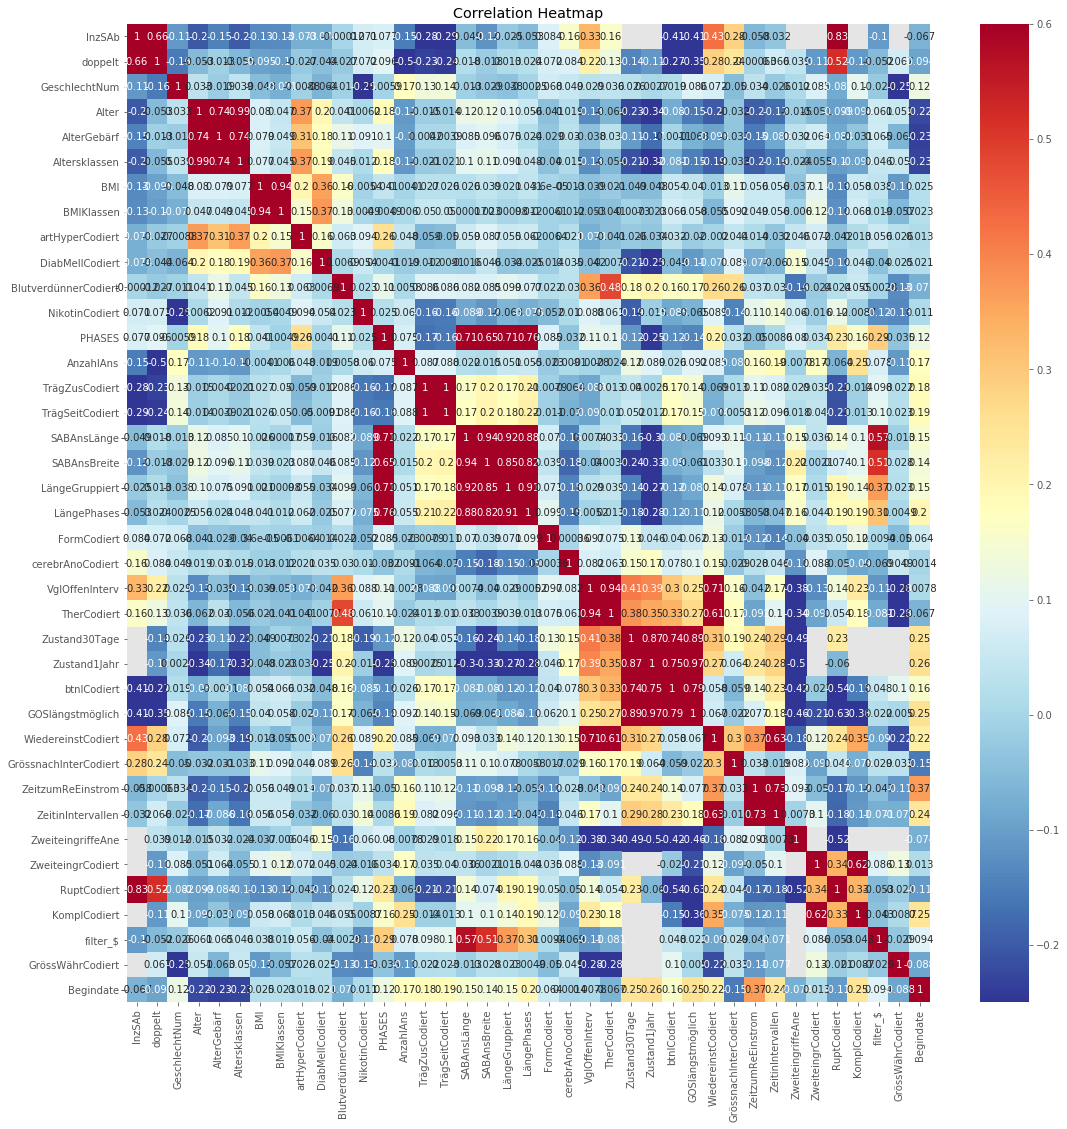

In [27]:
plt.figure(figsize = (18, 18))

# Heatmap of correlations
sns.heatmap(all_features_corrs, cmap = plt.cm.RdYlBu_r, vmin = -1, annot = True, vmax = 1)
plt.title('Correlation Heatmap');

In [109]:
#newdf_withzerofilled = newdf.fillna(0)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    #display(newdf_withzerofilled.head(450))
    display(newdf_withzerofilled.isnull().sum())
    #print("---------------------------")
    #display(newdf.dtypes)

patientId                0
InzSAb                   0
doppelt                  0
GeschlechtNum            0
Alter                    0
AlterGebärf              0
Altersklassen            0
BMI                      0
BMIKlassen               0
artHyperCodiert          0
DiabMellCodiert          0
BlutverdünnerCodiert     0
NikotinCodiert           0
PHASES                   0
AnzahlAns                0
TrägZusCodiert           0
TrägSeitCodiert          0
SABAnsLänge              0
SABAnsBreite             0
LängeGruppiert           0
LängePhases              0
FormCodiert              0
cerebrAnoCodiert         0
VglOffenInterv           0
TherCodiert              0
Zustand30Tage            0
Zustand1Jahr             0
btnlCodiert              0
GOSlängstmöglich         0
WiedereinstCodiert       0
GrössnachInterCodiert    0
ZeitzumReEinstrom        0
ZeitinIntervallen        0
ZweiteingriffeAne        0
ZweiteingrCodiert        0
RuptCodiert              0
KomplCodiert             0
f

In [110]:
newdf_withzerofilled.to_csv(r'/home/charvi/TGAN/preprocessedclinical_data.csv',encoding='ISO-8859-3' ,index = False)

In [55]:
dataset=pd.read_csv(r'/home/charvijain16/TGAN/TGAN/data_project/preprocessed_data.csv',encoding='ISO-8859-3')

In [64]:
pd.options.display.max_columns = None
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,1,2.0,62.0,2.0,13.0,34.0,4.0,2.0,1.0,3.0,0.0,6.0,2.0,2.0,3.0,3.0,2.0,1.0,1.0,4.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,5.0,1
1,1,2.0,30.0,1.0,7.0,26.0,3.0,1.0,1.0,3.0,0.0,5.0,2.0,5.0,9.0,2.0,2.0,1.0,1.0,4.0,1.0,3.0,5.0,0.0,0.0,2.0,5.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,10.0,1
2,1,2.0,46.0,2.0,10.0,26.0,3.0,2.0,2.0,1.0,2.0,6.0,4.0,5.0,8.0,5.0,2.0,1.0,1.0,3.0,7.0,2.0,2.0,0.0,0.0,2.0,5.0,2.0,1.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,1.0,8.0,1
3,1,2.0,45.0,1.0,10.0,21.0,2.0,2.0,1.0,1.0,0.0,6.0,3.0,2.0,3.0,5.0,3.0,1.0,1.0,3.0,1.0,3.0,4.0,0.0,0.0,2.0,4.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,6.0,1
4,1,2.0,59.0,2.0,12.0,25.0,3.0,2.0,1.0,2.0,0.0,2.0,3.0,9.0,15.0,4.0,3.0,1.0,1.0,3.0,8.0,3.0,5.0,0.0,0.0,2.0,5.0,2.0,1.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,1.0,7.0,1


In [63]:
dataset["label"] = dataset.InzSAb

dataset = dataset.drop(["InzSAb"], axis=1)

AttributeError: 'DataFrame' object has no attribute 'InzSAb'

In [11]:
dataset.to_csv(r'/home/charvijain16/TGAN/TGAN/data_project/preprocessed_data.csv',encoding='ISO-8859-3' ,index = False)